## Machine learning


*   Lab 02 - 12.10.2018
*   Lab 03



In [0]:
import numpy as np 

### Sample file

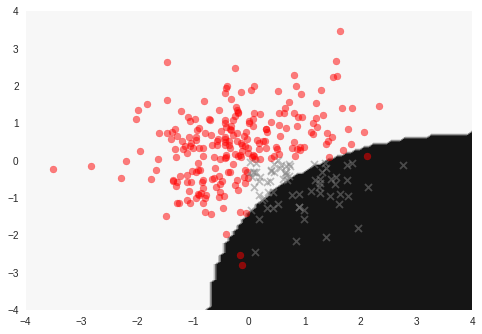

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sigma(x):
    return 1 / (1 + math.exp( -x ))

def getFakeNeuralNetOutput(x, y):
    firstLayerNeuron1 = sigma(x + 0.01 * y)
    firstLayerNeuron2 = sigma(0.01 * x + y)
    outputLayer1 = sigma( firstLayerNeuron1 -  firstLayerNeuron2 + 0.3)
    outputLayer2 = sigma(-  firstLayerNeuron1 + firstLayerNeuron2 - 0.3)
    return [outputLayer1, outputLayer2]

def getDecisionOfFakeNeuralNet(x, y):
    output = getFakeNeuralNetOutput(x, y)
    return 1 if output[1] > output[0] else 0

def getSamples(N):
    samples = []
    for i in range(N):
        x = np.random.normal()
        y = np.random.normal()
        which = 1 if x > 0 and y < 0 else 0
        samples.append( (x, y, which) )
    return samples

def plotDecisionDomain(listOfX, listOfY, decisionFunction):
    arrayOfX, arrayOfY = np.meshgrid(listOfX, listOfY)
    plt.contourf(arrayOfX, arrayOfY, [[decisionFunction(x, y) for y in listOfY] for x in listOfX])

def plotSamples(samples):
    markers = ['o', 'x']
    colors = ['red', 'gray']
    for sample in samples:
        plt.scatter(sample[0], sample[1],
                    marker = markers[sample[2]], color = colors[sample[2]],
                    alpha = 0.5)

def getGrid(view):
    return [view[0] + (view[1] - view[0]) * i / (view[2] - 1) for i in range(view[2])]

numberOfSamples = 300
samples = getSamples(numberOfSamples)

viewX = [-4, 4, 101]
viewY = [-4, 4, 101]

plotDecisionDomain(getGrid(viewX), getGrid(viewY), getDecisionOfFakeNeuralNet)
plotSamples(samples)
plt.show()


#### Testing np dot

In [0]:
w = np.random.randint(10, size=(2,5))

In [26]:
w

array([[6, 0, 9, 9, 9],
       [5, 1, 5, 1, 9]])

In [0]:
X=[1,2,3,4,5]

In [28]:
np.dot(w,X)

array([114,  71])

In [31]:
np.sum(w*X, axis=1)

array([114,  71])

### Basic Neural Network model

In [0]:
def initialize_weights(layer_dims):
  parameters = {}
  L = len(layer_dims)            # number of layers in the network
  for l in range(1, L):
    parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
  return parameters


def sigmoid(x):
  return 1 / (1 + np.exp(-x))  

  
def NN_model_forward(X, parameters):
  A = X.copy()
  A.append(-1)                       # add bias 
  L = len(parameters)                # number of layers in the neural network  
  for l in range(1, L+1):
    W = parameters['W' + str(l)]     # current layer weights
    A = sigmoid(np.dot(W, A))          
  return A

In [0]:
X = [0.2, 0.4, 0.8, 0.1]
Y = [0, 0, 1, 1]

layers_dims = [len(X)+1, 2, 1] # layer_dims = [input, hidden_layers, output]
weights = initialize_weights(layers_dims)
output = NN_model_forward(X, weights)

In [104]:
output

array([0.50031413])